# Iris Flowers Classification ML Project

<B><I>Libraries</I></B>

In [76]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import random

<B><I>Fetching Dataset</I></B>

In [2]:
dataframe = pd.read_csv("iris.csv")

In [3]:
dataframe.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 
1) Iris Versicolor
2) Iris Santosa
3) Iris Virginika

<B><I>Shuffling Data</I></B>

In [4]:
df = dataframe.sample(frac=1)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
124,6.7,3.3,5.7,2.1,Virginica
127,6.1,3.0,4.9,1.8,Virginica
64,5.6,2.9,3.6,1.3,Versicolor
46,5.1,3.8,1.6,0.2,Setosa
35,5.0,3.2,1.2,0.2,Setosa


In [5]:
iris = df.values
iris

array([[6.7, 3.3, 5.7, 2.1, 'Virginica'],
       [6.1, 3.0, 4.9, 1.8, 'Virginica'],
       [5.6, 2.9, 3.6, 1.3, 'Versicolor'],
       [5.1, 3.8, 1.6, 0.2, 'Setosa'],
       [5.0, 3.2, 1.2, 0.2, 'Setosa'],
       [7.2, 3.0, 5.8, 1.6, 'Virginica'],
       [5.5, 2.5, 4.0, 1.3, 'Versicolor'],
       [6.0, 2.2, 5.0, 1.5, 'Virginica'],
       [5.6, 2.7, 4.2, 1.3, 'Versicolor'],
       [5.3, 3.7, 1.5, 0.2, 'Setosa'],
       [5.5, 4.2, 1.4, 0.2, 'Setosa'],
       [6.7, 3.0, 5.2, 2.3, 'Virginica'],
       [6.4, 3.2, 5.3, 2.3, 'Virginica'],
       [6.3, 2.8, 5.1, 1.5, 'Virginica'],
       [5.0, 2.0, 3.5, 1.0, 'Versicolor'],
       [6.2, 3.4, 5.4, 2.3, 'Virginica'],
       [4.8, 3.4, 1.9, 0.2, 'Setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Setosa'],
       [6.4, 3.2, 4.5, 1.5, 'Versicolor'],
       [5.8, 2.7, 3.9, 1.2, 'Versicolor'],
       [7.7, 3.8, 6.7, 2.2, 'Virginica'],
       [4.4, 2.9, 1.4, 0.2, 'Setosa'],
       [5.2, 2.7, 3.9, 1.4, 'Versicolor'],
       [6

In [6]:
df.shape

(150, 5)

<B><I>Distributing Data</B> <Br>X = Question & Y = Answer <Br>Float is defined because we want as it is data. </I>

In [7]:
val_x = iris[:20,:4].astype(float)
val_y = iris[:20,4]

x_train = iris[20:110,:4].astype(float)
y_train = iris[20:110,4]

x_test = iris[110:,:4].astype(float)
y_test = iris[110:,4]

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, val_x.shape, val_y.shape

((90, 4), (90,), (40, 4), (40,), (20, 4), (20,))

<B><I>Encoding string into numarics</I></B>

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder= LabelEncoder()
encoded_Y = encoder.fit_transform(y_train)
encoded_y_train = tf.keras.utils.to_categorical(encoded_Y)

encoded_Y = encoder.fit_transform(y_test)
encoded_y_test = tf.keras.utils.to_categorical(encoded_Y)

encoded_Y = encoder.fit_transform(val_y)
encoded_val = tf.keras.utils.to_categorical(encoded_Y)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Preparing Model Layers

In [11]:
model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Training Model

In [14]:
history = model.fit(x_train, encoded_y_train, epochs=130, verbose=1, validation_data=(val_x,encoded_val))

Epoch 1/130
3/3 [==============================] - 1s 97ms/step - loss: 1.4146 - accuracy: 0.3111 - val_loss: 1.3081 - val_accuracy: 0.4000
Epoch 2/130
3/3 [==============================] - 0s 15ms/step - loss: 1.3855 - accuracy: 0.3111 - val_loss: 1.2779 - val_accuracy: 0.4000
Epoch 3/130
3/3 [==============================] - 0s 14ms/step - loss: 1.3497 - accuracy: 0.3111 - val_loss: 1.2489 - val_accuracy: 0.4000
Epoch 4/130
3/3 [==============================] - 0s 12ms/step - loss: 1.3154 - accuracy: 0.3111 - val_loss: 1.2211 - val_accuracy: 0.4000
Epoch 5/130
3/3 [==============================] - 0s 10ms/step - loss: 1.2841 - accuracy: 0.3111 - val_loss: 1.1939 - val_accuracy: 0.4000
Epoch 6/130
3/3 [==============================] - 0s 13ms/step - loss: 1.2516 - accuracy: 0.3111 - val_loss: 1.1683 - val_accuracy: 0.4000
Epoch 7/130
3/3 [==============================] - 0s 12ms/step - loss: 1.2229 - accuracy: 0.3111 - val_loss: 1.1437 - val_accuracy: 0.4000
Epoch 8/130
3/3 [===

3/3 [==============================] - 0s 14ms/step - loss: 0.5384 - accuracy: 0.7889 - val_loss: 0.5481 - val_accuracy: 0.8500
Epoch 60/130
3/3 [==============================] - 0s 12ms/step - loss: 0.5336 - accuracy: 0.8000 - val_loss: 0.5436 - val_accuracy: 0.8500
Epoch 61/130
3/3 [==============================] - 0s 12ms/step - loss: 0.5291 - accuracy: 0.8111 - val_loss: 0.5397 - val_accuracy: 0.8500
Epoch 62/130
3/3 [==============================] - 0s 12ms/step - loss: 0.5248 - accuracy: 0.8111 - val_loss: 0.5361 - val_accuracy: 0.8500
Epoch 63/130
3/3 [==============================] - 0s 10ms/step - loss: 0.5203 - accuracy: 0.8333 - val_loss: 0.5319 - val_accuracy: 0.8500
Epoch 64/130
3/3 [==============================] - 0s 12ms/step - loss: 0.5164 - accuracy: 0.8333 - val_loss: 0.5279 - val_accuracy: 0.8500
Epoch 65/130
3/3 [==============================] - 0s 10ms/step - loss: 0.5124 - accuracy: 0.8444 - val_loss: 0.5246 - val_accuracy: 0.8500
Epoch 66/130
3/3 [========

3/3 [==============================] - 0s 12ms/step - loss: 0.3416 - accuracy: 0.9778 - val_loss: 0.3629 - val_accuracy: 1.0000
Epoch 118/130
3/3 [==============================] - 0s 10ms/step - loss: 0.3383 - accuracy: 0.9778 - val_loss: 0.3601 - val_accuracy: 1.0000
Epoch 119/130
3/3 [==============================] - 0s 12ms/step - loss: 0.3350 - accuracy: 0.9778 - val_loss: 0.3553 - val_accuracy: 1.0000
Epoch 120/130
3/3 [==============================] - 0s 12ms/step - loss: 0.3314 - accuracy: 0.9778 - val_loss: 0.3519 - val_accuracy: 1.0000
Epoch 121/130
3/3 [==============================] - 0s 12ms/step - loss: 0.3285 - accuracy: 0.9778 - val_loss: 0.3499 - val_accuracy: 1.0000
Epoch 122/130
3/3 [==============================] - 0s 12ms/step - loss: 0.3247 - accuracy: 0.9778 - val_loss: 0.3458 - val_accuracy: 1.0000
Epoch 123/130
3/3 [==============================] - 0s 12ms/step - loss: 0.3215 - accuracy: 0.9778 - val_loss: 0.3417 - val_accuracy: 1.0000
Epoch 124/130
3/3 [=

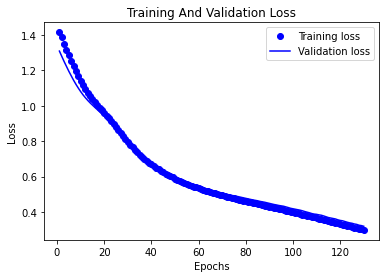

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

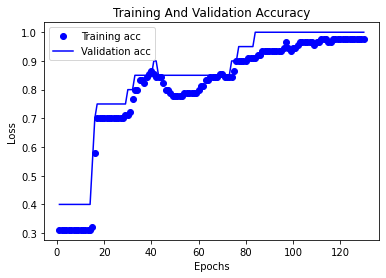

In [16]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# <B>TEST Prediction</B>

<B><I>Picking Random Test data</I></B>

In [86]:
random_x = []
for i in range(3):
    num = random.randint(0,39)
    random_x.append(num)
random_x

[26, 20, 38]

<B><I>Making an array of those data values</I></B>

In [89]:
x = np.array([x_test[random_x[0]],x_test[random_x[1]],x_test[random_x[2]]])
x

array([[5.7, 2.8, 4.1, 1.3],
       [5.1, 3.8, 1.9, 0.4],
       [6.5, 3. , 5.5, 1.8]])

In [90]:
prediction = model.predict(x)
prediction

array([[0.06290578, 0.61137074, 0.32572347],
       [0.9574118 , 0.03292243, 0.00966581],
       [0.0163393 , 0.31343237, 0.67022836]], dtype=float32)

<B><I>Defining Classes</I></B>

In [88]:
class_names = df['variety'].unique()
class_names

array(['Virginica', 'Versicolor', 'Setosa'], dtype=object)

<B><I>Prediction Results</I></B>

In [91]:
results = []
for check in prediction:
    index = np.argmax(check)
    results.append(class_names[index])
results

['Versicolor', 'Virginica', 'Setosa']